In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

In [2]:
matdat = loadmat('ALMdata.mat')

In [3]:
non_preferred= matdat['PSTH_nonprefer_cue_aligned']
preferred= matdat['PSTH_prefer_cue_aligned']
t= matdat['t'][0]
chanidx= matdat['Channel_all']

# flatten column vector
chanidx = chanidx.flatten()

### Remove nulls

In [4]:
non_preferred = non_preferred[np.isfinite(non_preferred[:,0]), :]
chanidx = chanidx[np.isfinite(preferred[:,0])]

preferred = preferred[np.isfinite(preferred[:,0]), :]


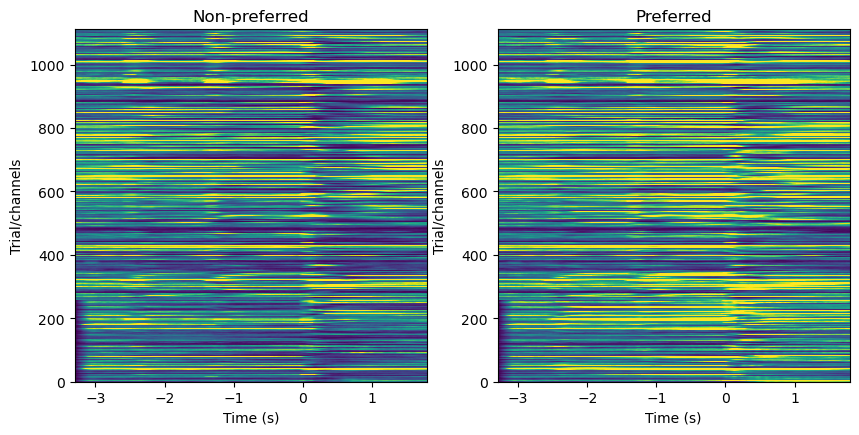

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(non_preferred,extent=[t[0], t[-1], 0, non_preferred.shape[0]], 
             vmin=0, vmax=10,origin='lower')
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Trial/channels')
ax[0].set_title('Non-preferred')

ax[1].imshow(preferred,extent=[t[0], t[-1], 0, preferred.shape[0]],
             vmin=0, vmax=10,
             origin='lower'
            )
ax[1].set_aspect(1/ax[0].get_data_ratio())
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Trial/channels')
ax[1].set_title('Preferred')

plt.show()

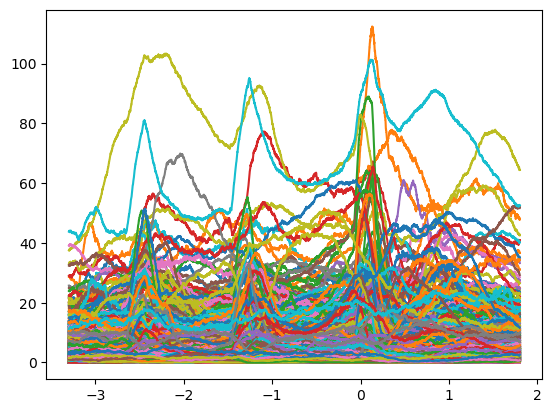

In [6]:
plt.plot(t, non_preferred.T)
plt.show()

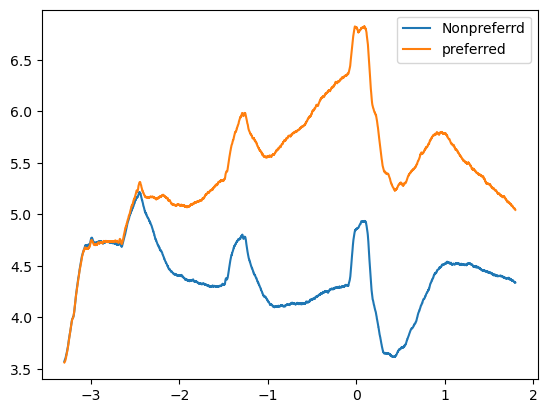

In [7]:
plt.plot(t, np.mean(non_preferred, axis=0), label='Nonpreferrd')
plt.plot(t, np.mean(preferred, axis=0), label='preferred')
plt.legend()
plt.show()

### Covariance matrix

In [8]:
# create a new data matrix, averaging across channels

nchans = np.max(chanidx)
chan_avg_non_preferred = np.zeros((nchans, len(t)))
chan_avg_preferred = np.zeros((nchans, len(t)))


for i in range(1, nchans+1):
    chan_avg_non_preferred[i-1,:] = np.mean(non_preferred[chanidx==i, :], axis=0)
    chan_avg_preferred[i-1,:] = np.mean(preferred[chanidx==i, :], axis=0)
    

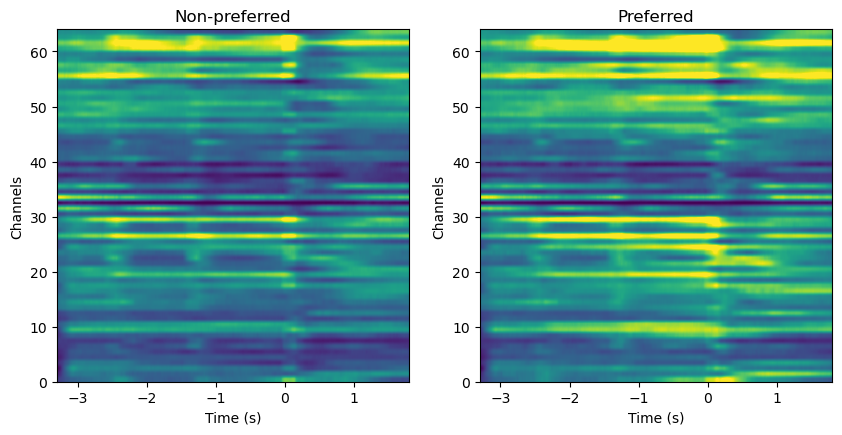

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(chan_avg_non_preferred,extent=[t[0], t[-1], 0, nchans], 
             vmin=0, vmax=10,origin='lower')
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Channels')
ax[0].set_title('Non-preferred')

ax[1].imshow(chan_avg_preferred,extent=[t[0], t[-1], 0, nchans],
             vmin=0, vmax=10,
             origin='lower'
            )
ax[1].set_aspect(1/ax[0].get_data_ratio())
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Channels')
ax[1].set_title('Preferred')

plt.show()

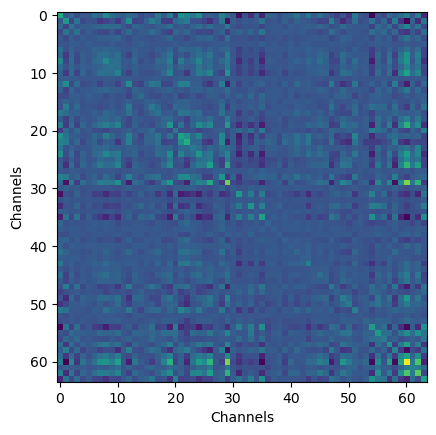

In [11]:
# compute covariange matrix

covmat_non_preferred = np.cov(chan_avg_non_preferred)
covmat_preferred = np.cov(chan_avg_preferred)

covmat_average =( covmat_non_preferred + covmat_preferred)/2
plt.imshow(covmat_average)
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.show()

### PCA 

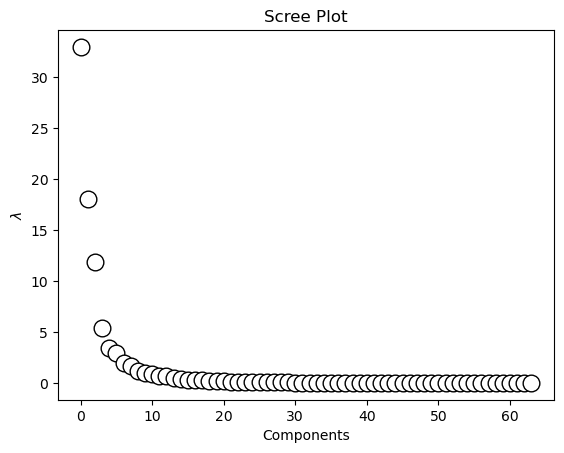

In [12]:
evals, evecs = np.linalg.eigh(covmat_average)

# reverse sort...descending order
sort_index = np.argsort(evals)[::-1]
evals = evals[sort_index]
evecs = evecs[:, sort_index]

plt.plot(evals, 'ko', markerfacecolor='w', markersize=12)
plt.xlabel('Components')
plt.ylabel('$\lambda$')
plt.title('Scree Plot')
plt.show()

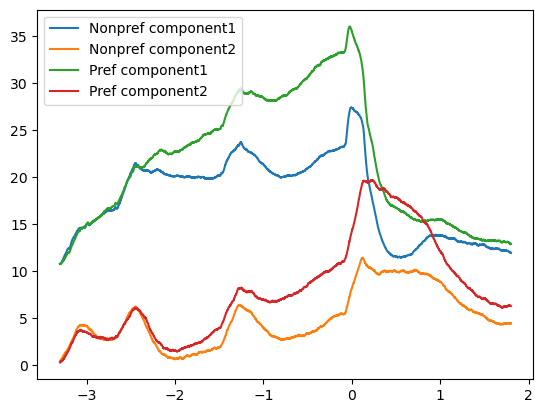

In [13]:
for i in range(2):
    # find the largest component magnitude
    max_indx = np.argmax(abs(evecs[:,i]))
    evecs[:,i] *= np.sign(evecs[max_indx, i])
    
    
# Compute PC Time series using matrix multiplication
pc_non_preferred = evecs[:, 0:2].T @ chan_avg_non_preferred
pc_preferred = evecs[:, 0:2].T @ chan_avg_preferred

plt.plot(t,pc_non_preferred.T, t, pc_preferred.T)
plt.legend(['Nonpref component1', 'Nonpref component2', 'Pref component1', 'Pref component2'])
plt.show()


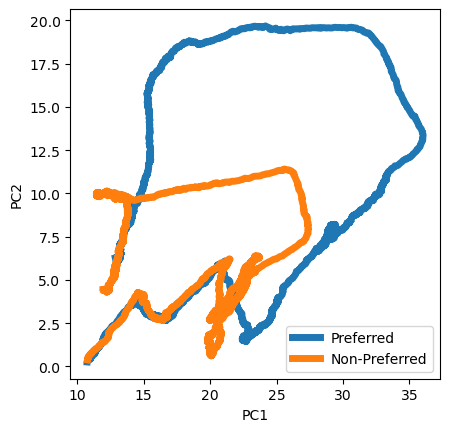

In [19]:
plt.plot(pc_preferred[0,:], pc_preferred[1,:], linewidth=5, label='Preferred')
plt.plot(pc_non_preferred[0,:], pc_non_preferred[1,:], linewidth=5, label='Non-Preferred')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.legend()
plt.show()

### Draw time via hues

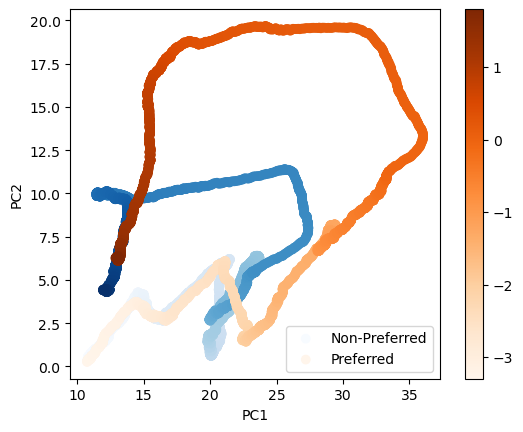

In [26]:
plt.scatter(pc_non_preferred[0,:], pc_non_preferred[1,:], cmap='Blues', c=t, label='Non-Preferred')
plt.scatter(pc_preferred[0,:], pc_preferred[1,:], cmap='Oranges', c=t, label='Preferred')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.legend()
plt.show()